In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [4]:
df.shape

(1190, 12)

In [5]:
#check statistic parameter
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


<Axes: xlabel='oldpeak', ylabel='Count'>

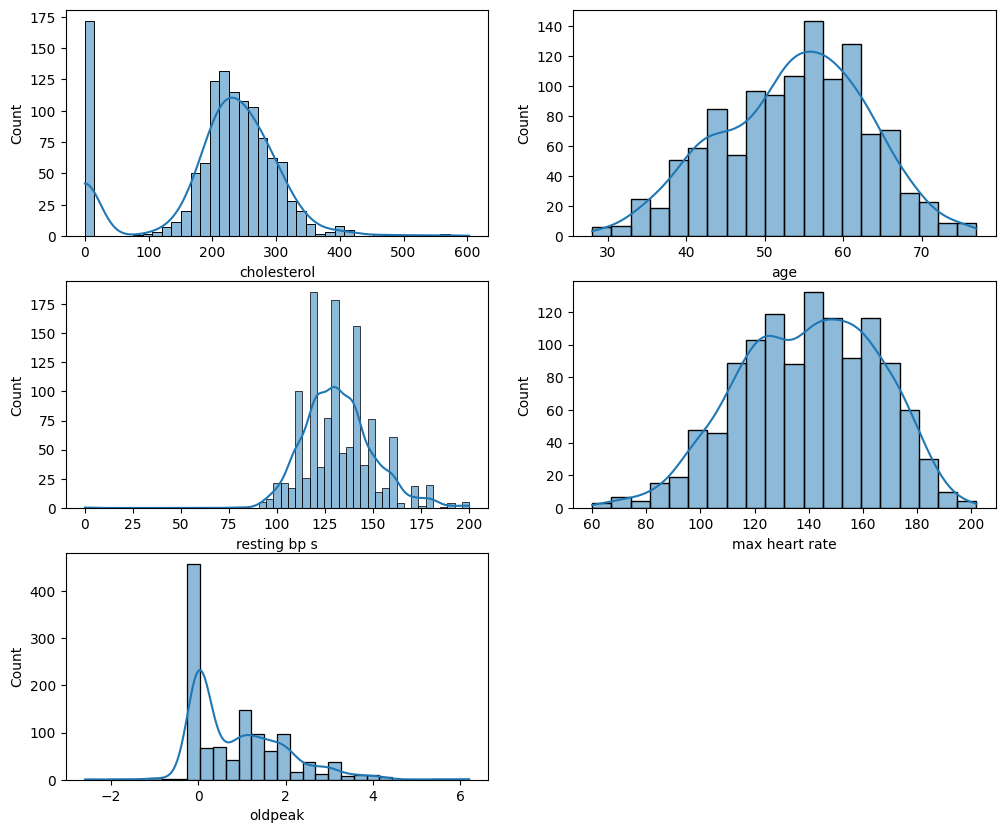

In [6]:
plt.figure(figsize=(12,10))

plt.subplot(321)
sns.histplot(df['cholesterol'], kde=True)

plt.subplot(322)
sns.histplot(df['age'], kde=True)

plt.subplot(323)
sns.histplot(df['resting bp s'], kde=True)

plt.subplot(324)
sns.histplot(df['max heart rate'], kde=True)

plt.subplot(325)
sns.histplot(df['oldpeak'], kde=True)

in cholesterol column there are so many values are 0 which is not possible for alive humans. so replace zeros value with mean or median of cholesterol

in columns also some values are 0 which is not possible for alive humans. so, replace zeros value with mean or median of resting bp s

In [7]:
df['cholesterol'] = df['cholesterol'].replace(0, df['cholesterol'].median())
df['resting bp s'] = df['resting bp s'].replace(0, df['resting bp s'].median())

In [8]:
df[df['cholesterol']==0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


In [9]:
df[df['resting bp s']==0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


<Axes: xlabel='resting bp s', ylabel='Count'>

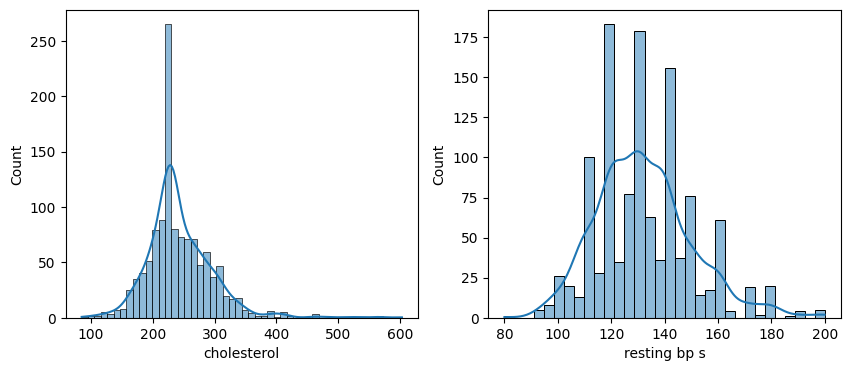

In [10]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.histplot(df['cholesterol'], kde=True)

plt.subplot(122)
sns.histplot(df['resting bp s'], kde=True)


#### Now replace 0 with median in both columns.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In dataset no null values are presetn

In [12]:
#check imbalance in dataset
df.target.value_counts()

target
1    629
0    561
Name: count, dtype: int64

In [13]:
#our target variable have two category which comes under classification regression. So, we are choosing random forest classifier

In [14]:
#decide x and y
X = df.drop(columns='target')
y = df[['target']]
X.shape, y.shape

((1190, 11), (1190, 1))

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [18]:
#split train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((952, 11), (238, 11), (952, 1), (238, 1))

In [19]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
rfc_predicted = rfc.predict(x_test)
print(classification_report(y_test, rfc_predicted))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.94      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



### Model has accuracy of 95.1 % which is good.

In [23]:
confusion_matrix(y_test, rfc_predicted)

array([[ 99,   8],
       [  5, 126]])

In [24]:
rfc.feature_importances_, rfc.feature_names_in_

(array([0.09541647, 0.04035681, 0.13532848, 0.08126365, 0.08567219,
        0.02337024, 0.02946596, 0.12396433, 0.07205631, 0.11923883,
        0.19386672]),
 array(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
        'fasting blood sugar', 'resting ecg', 'max heart rate',
        'exercise angina', 'oldpeak', 'ST slope'], dtype=object))

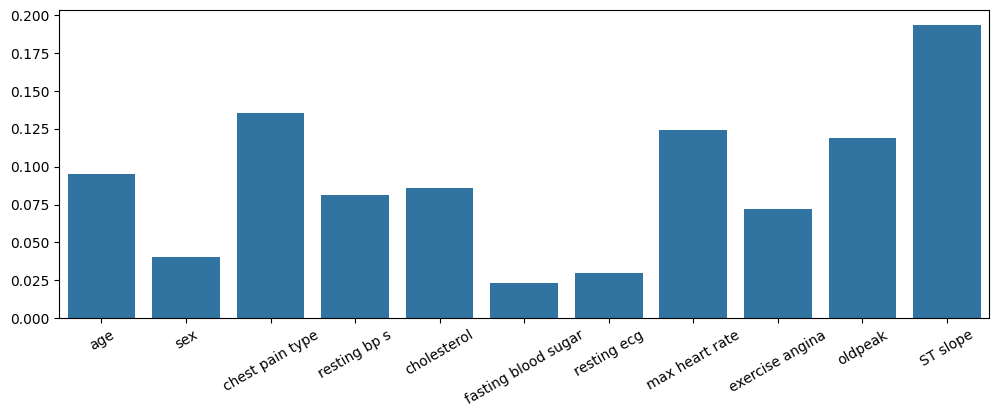

In [25]:
#checking the contribution of each feature in model
plt.figure(figsize=(12,4))
sns.barplot(x=rfc.feature_names_in_, y= rfc.feature_importances_)
plt.xticks(rotation = 30)
plt.show()

In [26]:
import joblib

joblib.dump(rfc, 'rfc_model.pkl')

['rfc_model.pkl']

### Project Completed by Deepak Kumar

### Thank you !